In [1]:
# Git clone and run tests on updates branch
!git clone https://github.com/ultralytics/ultralytics -b main
%pip install -qe ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 61898, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 61898 (delta 170), reused 112 (delta 104), pack-reused 61660 (from 4)
Receiving objects: 100% (61898/61898), 33.61 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (46047/46047), done.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip", 'r')
!unzip "/content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip"

Mounted at /content/drive/
Archive:  /content/drive/MyDrive/Rock-paper-scissors.v2i.yolov11.zip
   creating: Rock-paper-scissors.v2i.yolov11/
  inflating: Rock-paper-scissors.v2i.yolov11/data.yaml  
  inflating: Rock-paper-scissors.v2i.yolov11/README.dataset.txt  
  inflating: Rock-paper-scissors.v2i.yolov11/README.roboflow.txt  
   creating: Rock-paper-scissors.v2i.yolov11/train/
   creating: Rock-paper-scissors.v2i.yolov11/train/images/
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110328_383__jpg.rf.3cc7a0abd436ceb653dc09511d3681e8.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110329_878__jpg.rf.67c6393435aeebdb77b36372408c55ff.jpg  
  inflating: Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110332_875__jpg.rf.329d3ec1358080b80b24cfc881947a72.jpg  
  inflating: Rock-paper-s

In [3]:
!yolo train model=yolo11n.pt data=/content/Rock-paper-scissors.v2i.yolov11/data.yaml epochs=100 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 67.5MB/s]
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-paper-scissors.v2i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, h

In [4]:
!yolo predict model=ultralytics/runs/detect/train/weights/last.pt source='Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg'

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Rock-paper-scissors.v2i.yolov11/train/images/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg: 640x640 1 Rock, 11.1ms
Speed: 3.0ms preprocess, 11.1ms inference, 146.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ultralytics/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
!pip install matplotlib

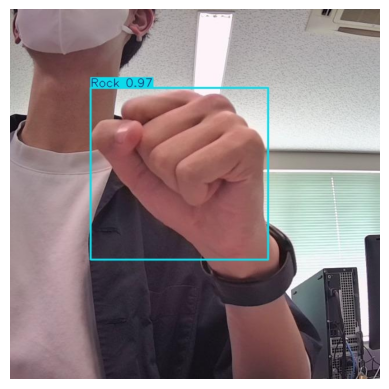

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/ultralytics/runs/detect/predict/label_0_20220818_110327_457__jpg.rf.c2ab9724d23bab74c182c36b6599ba8c.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()